In [3]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import  datasets
import matplotlib.pyplot as plt
%matplotlib inline

1) model

2. loss and optimizer

3.  training loop

In [55]:
_X,_Y  = datasets.make_regression(n_samples=100, n_features=1,noise=20, random_state=1)
#numpy array

In [56]:
X = torch.from_numpy(_X.astype(np.float32))
y = torch.from_numpy(_Y.astype(np.float32))
y = y.view(-1,1)

In [57]:
# z = y.view(y.shape[0],1)
n_samples, n_features = X.shape
input_size = n_features
output_size = 1

In [58]:
model = nn.Linear(input_size,output_size)

In [59]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

training loop

1. forward pass: compute predictin and loss

2. backward pass: gradients

3. update weights

In [60]:
num_epochs = 400
for epoch in range(num_epochs):
    #forward pass
    y_pred = model(X)
    loss = criterion(y_pred,y)
    #backward pass
    loss.backward()
    #update
    optimizer.step()
    optimizer.zero_grad()
    if not epoch%10:
        print(f"epoch: {epoch+1}, loss: {loss.item()}")

epoch: 1, loss: 5728.5986328125
epoch: 11, loss: 4244.94091796875
epoch: 21, loss: 3171.811279296875
epoch: 31, loss: 2394.769287109375
epoch: 41, loss: 1831.5509033203125
epoch: 51, loss: 1422.934326171875
epoch: 61, loss: 1126.2259521484375
epoch: 71, loss: 910.605224609375
epoch: 81, loss: 753.796142578125
epoch: 91, loss: 639.6814575195312
epoch: 101, loss: 556.584716796875
epoch: 111, loss: 496.04046630859375
epoch: 121, loss: 451.9054260253906
epoch: 131, loss: 419.7166748046875
epoch: 141, loss: 396.2303161621094
epoch: 151, loss: 379.08721923828125
epoch: 161, loss: 366.5693054199219
epoch: 171, loss: 357.4259033203125
epoch: 181, loss: 350.7452087402344
epoch: 191, loss: 345.8626708984375
epoch: 201, loss: 342.29327392578125
epoch: 211, loss: 339.6833190917969
epoch: 221, loss: 337.7745666503906
epoch: 231, loss: 336.37835693359375
epoch: 241, loss: 335.35687255859375
epoch: 251, loss: 334.6094055175781
epoch: 261, loss: 334.0624084472656
epoch: 271, loss: 333.6620178222656
ep

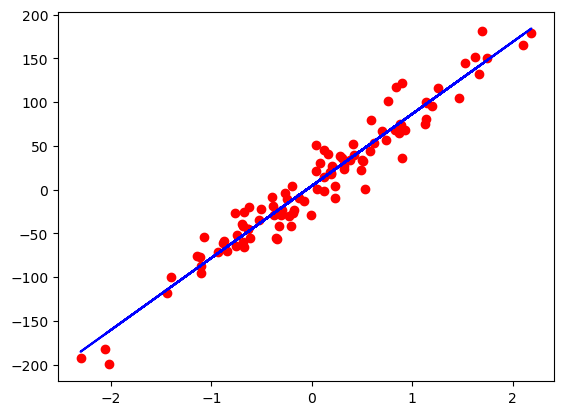

In [63]:
predicted = model(X).detach().numpy()
plt.plot(_X,_Y,'ro')
plt.plot(_X, predicted,'b')